# FIREX Campaign Spatial Intersect Exercise

In this exercise we are going to be looking at data from the FIREX campaign and comparing it with wildfire data shapes from the USGS. The `geopandas` lesson page will be a helpful reference. https://rwegener2.github.io/sarp_lessons/lessons/tabular_data/3_geopandas.html

In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [4]:
firex_all = pd.read_csv('../data/firexaq-mrg60-dc8_merge_20190722_R1_thru20190905.csv', skiprows=676)

_Note: This file was originally a `.ict` file but I used the File Explorer to re-name it to a `.csv` file. Pandas can open `.ict` files just fine, but I find that Excel has a hard time with them. If you rename the same file from `.ict` to `.csv`, however, Excel will open it up._

In [68]:
firex_all.describe()

,Fractional_Day,Time_Start,Time_Stop,Day_Of_Year_YANG,Latitude_YANG,Longitude_YANG,MSL_GPS_Altitude_YANG,HAE_GPS_Altitude_YANG,Pressure_Altitude_YANG,Radar_Altitude_YANG,...,jBrONO2_BrO_NO2_CAFS_HALL,jBrONO2_Br_NO3_CAFS_HALL,jBrCl_Br_Cl_CAFS_HALL,jCHBr3_NoProductsSpecified_CAFS_HALL,smoke_age_HOLMES,smoke_age_corr_HOLMES,smoke_age_rise_HOLMES,smoke_rise_HOLMES,fire_distance_HOLMES,smoke_agemethod_HOLMES
count,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,...,9081.000000,9081.000000,9081.000000,9.081000e+03,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000
mean,226.760197,81625.678890,81685.678890,225.815108,-1722.146676,-1869.220822,3156.048955,-2292.452929,15359.291967,12676.498769,...,-330.359580,-330.358731,-330.350287,-3.303598e+02,-822610.049450,-822536.417093,-826164.556287,-825761.166757,-800607.897810,-826244.062768
std,13.324944,11555.139635,11555.139635,13.390380,41942.180600,41936.002445,42262.242721,84775.483466,9758.671210,20621.489347,...,18173.790620,18173.790636,18173.790789,1.817379e+04,386958.865866,387131.448999,379073.762924,379953.825504,444493.726463,378901.670616
min,203.762500,52470.000000,52530.000000,203.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,508.533300,-999999.000000,...,-999999.000000,-999999.000000,-999999.000000,-9.999990e+05,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000
25%,215.930556,73230.000000,73290.000000,215.000000,34.776165,-116.700670,2541.030000,2382.890000,7842.780000,5530.440000,...,0.000104,0.000588,0.006327,1.928000e-07,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000
50%,226.048611,81930.000000,81990.000000,225.000000,38.273844,-112.260533,4742.480000,4663.480000,14643.200000,10821.500000,...,0.000207,0.001170,0.010991,8.174000e-07,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000
75%,238.902778,90030.000000,90090.000000,238.000000,45.356357,-95.753198,7715.070000,7685.270000,23975.300000,20293.000000,...,0.000256,0.001452,0.012980,1.246000e-06,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000
max,248.965972,107670.000000,107730.000000,248.000000,48.971215,-83.123175,12502.500000,12475.500000,38978.600000,39361.400000,...,0.000634,0.003593,0.032215,3.133000e-06,112476.600000,206980.500000,796.850000,9099.080000,932455.400000,7.000000


In [69]:
firex_all = firex_all.replace({-999999: np.nan, -888888: np.nan, -66666: np.nan})

## Processing the FIREX Dataset

1. Convert the pandas dataframe into a geodataframe. Be sure to specify the CRS as `epsg:4326`.

In [5]:
firex_all_gpd = gpd.GeoDataFrame(firex_all, 
                                geometry=gpd.points_from_xy(firex_all[' Longitude_YANG'], 
                                                            firex_all[' Latitude_YANG']),
                                crs="epsg:4326")

In [71]:
firex_all_gpd.describe()

,Fractional_Day,Time_Start,Time_Stop,Day_Of_Year_YANG,Latitude_YANG,Longitude_YANG,MSL_GPS_Altitude_YANG,HAE_GPS_Altitude_YANG,Pressure_Altitude_YANG,Radar_Altitude_YANG,...,jBrONO2_BrO_NO2_CAFS_HALL,jBrONO2_Br_NO3_CAFS_HALL,jBrCl_Br_Cl_CAFS_HALL,jCHBr3_NoProductsSpecified_CAFS_HALL,smoke_age_HOLMES,smoke_age_corr_HOLMES,smoke_age_rise_HOLMES,smoke_rise_HOLMES,fire_distance_HOLMES,smoke_agemethod_HOLMES
count,9081.000000,9081.000000,9081.000000,9081.000000,9065.000000,9065.000000,9065.000000,9016.000000,9081.000000,9078.000000,...,9.078000e+03,9.078000e+03,9078.000000,9.078000e+03,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1576.000000
mean,226.760197,81625.678890,81685.678890,225.815108,39.842254,-107.491482,4926.648049,4900.418140,15359.291967,13011.156898,...,1.820398e-04,1.031560e-03,0.009478,7.772255e-07,20830.569037,21254.305057,375.260685,2696.667731,147447.513934,2.217640
std,13.324944,11555.139635,11555.139635,13.390380,5.594977,11.136158,3119.819768,3128.538927,9758.671210,9291.767144,...,1.059127e-04,6.001723e-04,0.005159,5.835173e-07,24428.168366,25505.881144,161.655661,1344.739552,221486.832200,1.747624
min,203.762500,52470.000000,52530.000000,203.000000,30.433093,-121.735441,161.883300,126.900000,508.533300,4.029410,...,-1.088000e-07,-6.164000e-07,-0.000006,-2.380000e-09,271.000000,267.666700,40.683300,284.633300,326.666700,1.000000
25%,215.930556,73230.000000,73290.000000,215.000000,34.789289,-116.657733,2542.680000,2515.687500,7842.780000,5534.447500,...,1.040000e-04,5.893750e-04,0.006330,1.929250e-07,5996.932500,6013.412500,266.479200,1865.667500,28960.500000,1.000000
50%,226.048611,81930.000000,81990.000000,225.000000,38.284659,-112.255131,4747.580000,4677.575000,14643.200000,10828.000000,...,2.065000e-04,1.170150e-03,0.010991,8.180000e-07,10856.500000,11132.550000,349.191650,2444.385000,58520.550000,1.000000
75%,238.902778,90030.000000,90090.000000,238.000000,45.394370,-95.726413,7716.170000,7696.122500,23975.300000,20298.550000,...,2.563000e-04,1.452425e-03,0.012980,1.246750e-06,21005.975000,22196.800000,466.690275,3267.192500,115730.575000,4.000000
max,248.965972,107670.000000,107730.000000,248.000000,48.971215,-83.123175,12502.500000,12475.500000,38978.600000,39361.400000,...,6.340000e-04,3.592900e-03,0.032215,3.133000e-06,112476.600000,206980.500000,796.850000,9099.080000,932455.400000,7.000000


2. How many rows and columns are in this dataframe?

3. We have a pretty big dataframe. Let's filter it down to just the following columns:
```
['Fractional_Day', ' Time_Start', ' Time_Stop', ' Day_Of_Year_YANG',
       ' Latitude_YANG', ' Longitude_YANG', ' Pressure_Altitude_YANG', ' Potential_Temp_YANG', 
       ' Sat_Vapor_Press_H2O_YANG', ' Smoke_flag_SCHWARZ', ' BC_mass_90_550_nm_SCHWARZ', 'geometry']
```

In [6]:
firex_gpd = firex_all_gpd[['Fractional_Day', ' Time_Start', ' Time_Stop', ' Day_Of_Year_YANG',
       ' Latitude_YANG', ' Longitude_YANG', ' Pressure_Altitude_YANG', ' Potential_Temp_YANG', 
       ' Sat_Vapor_Press_H2O_YANG', ' Smoke_flag_SCHWARZ', ' BC_mass_90_550_nm_SCHWARZ', 'geometry']]

firex_day1_gpd = firex_gpd[np.floor(firex_gpd['Fractional_Day']) == 203]
# np.floor() returns the integer part of the decimal value without rounding

4. To keep filtering, let's filter it down to just the Fractional Day 203.

In [7]:
firex_day1_gpd = firex_gpd[np.floor(firex_gpd['Fractional_Day']) == 203]
# np.floor() returns the integer part of the decimal value without rounding

## Processing the Wildfires Shapefile

1. The `data` folder has a file at `wildfires_2019_usgs/wildfires_2019_usgs.shp` which contains all of the burn areas of fires in 2019. Open that file up using `gpd.read_file()` and give the filepath to that `.shp` file as an argument. Assign output to a variable called `wildfires`.

An example of using `gpd.read_file()` is [on the docs page](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html).

In [8]:
wildfires = gpd.read_file('../data/wildfires_2019_usgs/wildfires_2019_usgs.shp')

2. Look at the new dataframe. How many rows and columns does it have? What is the type of the geometry (Point, Polygon, Multipolygon, Line, etc.)?

In [9]:
wildfires

,FireName,FireCode,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,DataSrc,DataNotes,FireCause,FoundIn,FndNames,FndCodes,FndDates,FireQual,Shape_Leng,Shape_Area,geometry
0,083 Blue Ridge,2019-ORMAF-019083,2019,None,None,None,671.846716,271.886960,"Tier 2: Dissolved, blobbed fire perimeter",This fire is the combination of one or more no...,No cause indicated,Alternate Fire Sources: GeoMac Wildfires 2000-...,Alternate Fire Names: 083 Blue Ridge,Alternate Fire Codes: 2019-ORMAF-019083,"Alternate Ignition, Controlled, and Contained ...",2,6841.471381,2.718870e+06,"POLYGON ((-1737123.633 714061.045, -1737105.24..."
1,100 South,MG0J,2019,2019-07-22,2019-07-22,None,15.031115,6.082882,"Tier 2: Dissolved, blobbed fire perimeter",This fire is the combination of one or more no...,Human,Alternate Fire Sources: BLM National Fire Peri...,"Alternate Fire Names: 100 South, 100 South","Alternate Fire Codes: MG0J, MG0J","Alternate Ignition, Controlled, and Contained ...",2,1322.576248,6.082882e+04,"POLYGON ((-1384562.390 -126274.031, -1384561.9..."
2,160 Middle Ridge,2019-ORUMF-019160,2019,None,None,None,2708.906120,1096.256382,"Tier 2: Dissolved, blobbed fire perimeter",This fire is the combination of one or more no...,No cause indicated,Alternate Fire Sources: GeoMac Wildfires 2000-...,"Alternate Fire Names: 160 Middle Ridge, 161, 1...","Alternate Fire Codes: 2019-ORUMF-019160, 2019-...","Alternate Ignition, Controlled, and Contained ...",2,42877.304900,1.096256e+07,"MULTIPOLYGON (((-1722329.120 808717.932, -1722..."
3,17 Mile,MMG3,2019,2019-08-13,2019-08-13,None,11.676700,4.725397,"Tier 2: Dissolved, blobbed fire perimeter",This fire is the combination of one or more no...,Human,Alternate Fire Sources: BLM National Fire Peri...,Alternate Fire Names: 17 Mile,Alternate Fire Codes: MMG3,"Alternate Ignition, Controlled, and Contained ...",2,904.462930,4.725397e+04,"POLYGON ((-1236640.377 524691.514, -1236643.85..."
4,18,MJ15,2019,2019-07-31,2019-08-01,None,16.134956,6.529591,"Tier 2: Dissolved, blobbed fire perimeter",This fire is the combination of one or more no...,Unknown,Alternate Fire Sources: BLM National Fire Peri...,Alternate Fire Names: 18,Alternate Fire Codes: MJ15,"Alternate Ignition, Controlled, and Contained ...",2,2130.933795,6.529591e+04,"MULTIPOLYGON (((-1820270.865 -446692.962, -182..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,Yale,MNB8,2019,2019-08-20,2019-08-20,None,3.426372,1.386605,"Tier 2: Dissolved, blobbed fire perimeter",This fire is the combination of one or more no...,Unknown,Alternate Fire Sources: BLM National Fire Peri...,Alternate Fire Names: Yale,Alternate Fire Codes: MNB8,"Alternate Ignition, Controlled, and Contained ...",2,643.951177,1.386605e+04,"POLYGON ((-1335059.389 447376.657, -1335059.27..."
1451,YANKS,2019-AZCNF-000187,2019,2019-05-20,None,None,226.829272,91.794631,"Tier 2: Dissolved, blobbed fire perimeter",This fire is the combination of one or more no...,No cause indicated,Alternate Fire Sources: GeoMac Wildfires 2000-...,"Alternate Fire Names: YANKS, YANKS","Alternate Fire Codes: 2019-AZCNF-000187, 2019-...","Alternate Ignition, Controlled, and Contained ...",2,5634.056439,9.179463e+05,"POLYGON ((-1386341.051 -883784.673, -1386331.0..."
1452,YELLOW BLUFF 17 1,2019-FLFLS-070174,2019,None,None,None,554.839003,224.535577,"Tier 2: Dissolved, blobbed fire perimeter",This fire is the combination of one or more no...,No cause indicated,Alternate Fire Sources: GeoMac Wildfires 2000-...,Alternate Fire Names: YELLOW BLUFF 17 1,Alternate Fire Codes: 2019-FLFLS-070174,"Alternate Ignition, Controlled, and Contained ...",2,8931.819800,2.245356e+06,"MULTIPOLYGON (((1315991.137 -1003375.681, 1316..."
1453,YP 2,MG2W,2019,2019-07-23,2019-07-23,None,85.337947,34.535072,"Tier 2: Dissolved, blobbed fire perimeter",This fire is the combination of one or more no...,Natural,Alternate Fire Sources: BLM National Fire Peri...,"Alternate Fire Names: YP 2, YP","Alternate Fire Cod

3. What is the CRS of this dataframe?

In [10]:
wildfires.crs

<Derived Projected CRS: ESRI:102008>
Name: North_America_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

4. If you run `wildfires.plot()` you'll notice that the points are very difficult or impossible to see. To make the shapes easier to see let's make them larger, or buffer them by 100,000m. Use the `.buffer(100000)` method on the dataframe and then plot it to see the shape of the data more clearly.

<AxesSubplot:>

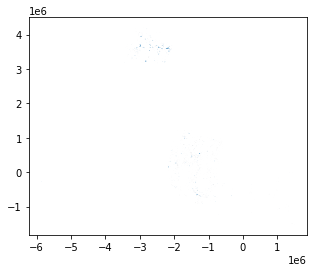

In [17]:
# Hard to see
wildfires.plot()

<AxesSubplot:>

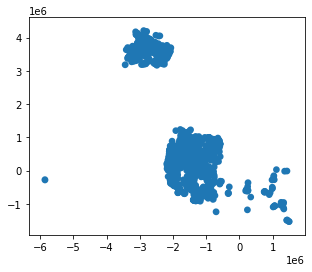

In [20]:
wildfires.buffer(100000).plot()

This image visually shows what a buffer operation does to points, lines, and polygons.

![Buffers](https://pro.arcgis.com/en/pro-app/2.8/tool-reference/analysis/GUID-267CF0D1-DB92-456F-A8FE-F819981F5467-web.png)

5. From that shape we can see that the wildfire data is spread out between the contiguous US (CONUS) Hawai'i and Alaska. To make our file more manegable let's cut it down to only the fires in CONUS.

In order to do that we are going to create a new shape that covers the area we want to keep and intersect the two areas. We are going to create a shape that is a box using `shapely`.

In [21]:
from shapely.geometry import box

In [ ]:
conus = box(-3000000, -2000000, 2000000, 2000000)  # In units of the dataset

Now that we have a shape `conus` defined, use the `.intersects()` method on the `wildfires` dataframe with `conus` as an argument. This will return a True/False boolean array indicating if each row in the dataframe intersects the `conus` shape.

In [26]:
wildfires.intersects(conus)

0        True
1        True
2        True
3        True
4        True
        ...  
1450     True
1451     True
1452     True
1453     True
1454    False
Length: 1455, dtype: bool

Use the True/False dataframe from the previous step to filter the `wildfires` dataframe.  Assign this dataframe to a new variable called `wildfires_conus`.

In [27]:
wildfires_conus = wildfires[wildfires.intersects(conus)]

6. Plot the new `wildfires_conus` dataframe again, again buffering by 10000m, to confirm that you have spatially filtered the dataframe.

<AxesSubplot:>

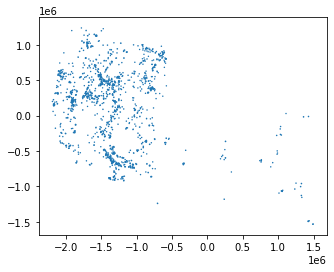

In [29]:
wildfires_conus.buffer(10000).plot()

Nice work! You have used two spatial data operations -- buffer and intersects -- in Python AND used those to spatially filter a dataframe!

### FIREX Data Filtering

In [76]:
firex_day1_gpd_esri = firex_day1_gpd.to_crs('ESRI:102008')

## Wildfire dataset

In [15]:
# Filtering the full wildfire dataset to just the fires in 2019
# full_wildfires = gpd.read_file('../data/Wildfires_1878_2019_Polygon_Data/Shapefile/US_Wildfires_1878_2019.shp')
# fires_2019 = full_wildfires[full_wildfires['FireYear'] == 2019]
# fires_2019.to_file('../data/wildfires_2019_usgs/wildfires_2019_usgs.shp')

In [12]:
wildfires = gpd.read_file('../data/wildfires_2019_usgs/wildfires_2019_usgs.shp')

In [1]:
# all_fires_shp = wildfires.dissolve()['geometry']
all_fires_shp = wildfires.unary_union

NameError: name 'wildfires' is not defined